### Importing necessary libraries


In [79]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore 
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score

## Q1.1) Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis)

### Importing the dataset

In [3]:
df= pd.read_csv('bank_marketing_part1_Data (2).csv')

### Checking basic information of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [6]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [7]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [8]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.85,2.91,10.59,12.27,14.36,17.30,21.18
advance_payments,210.0,14.56,1.31,12.41,13.45,14.32,15.72,17.25
probability_of_full_payment,210.0,0.87,0.02,0.81,0.86,0.87,0.89,0.92
current_balance,210.0,5.63,0.44,4.90,5.26,5.52,5.98,6.68
credit_limit,210.0,3.26,0.38,2.63,2.94,3.24,3.56,4.03
min_payment_amt,210.0,3.70,1.50,0.77,2.56,3.60,4.77,8.46
max_spent_in_single_shopping,210.0,5.41,0.49,4.52,5.04,5.22,5.88,6.55


In [9]:
df.duplicated().sum()

0

In [10]:
%matplotlib inline
from warnings import filterwarnings     
filterwarnings("ignore")

### Univariate Analysis

#### Observations -

- The above dataset contains 210 rows & 7 columns.
- All the variables/columns are of float datatype.
- There are no null and missing values in the dataset.
- The dataset does not have any duplicate values as well.

- To perform Univeriate analysis using Box plot and Distribution plot 

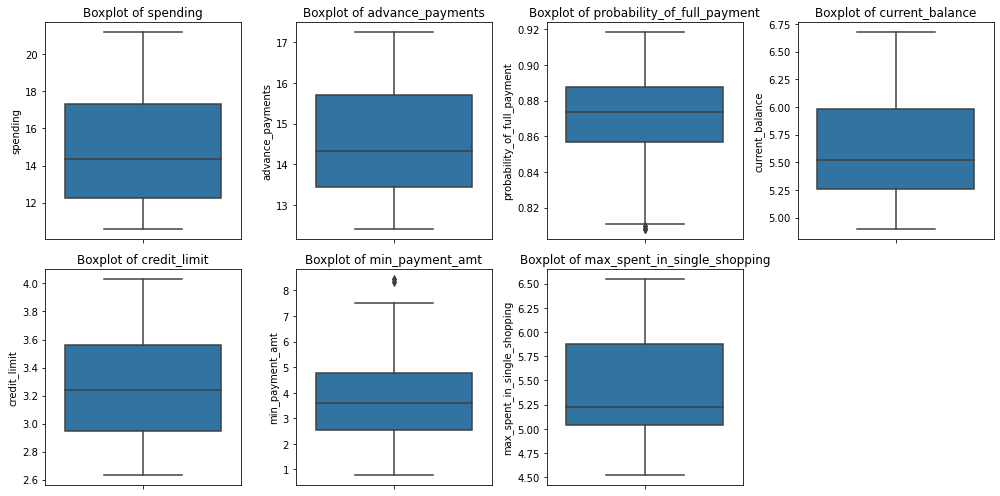

In [11]:
plt.figure(figsize=(14,7))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

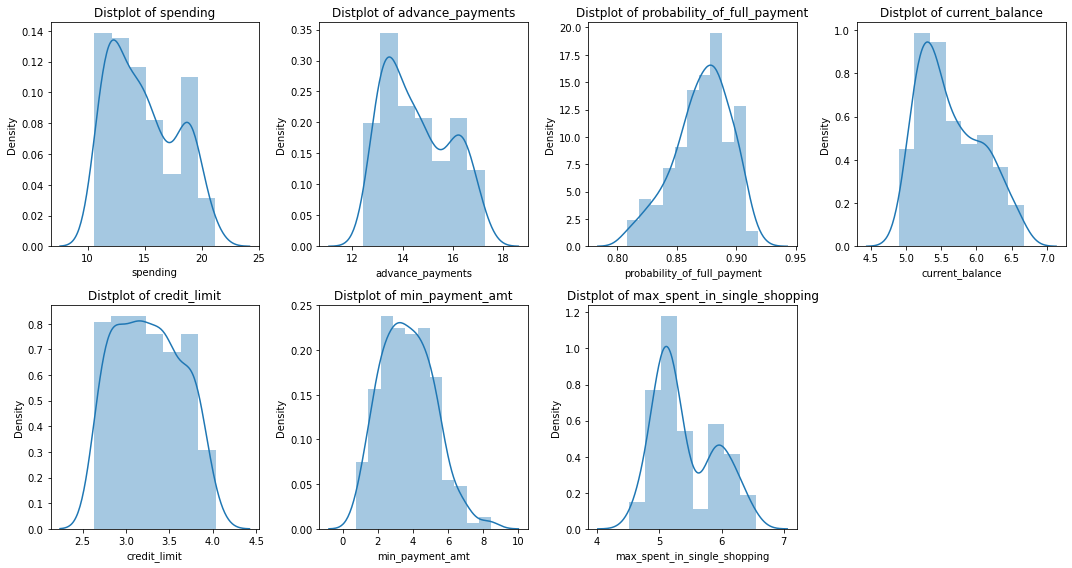

In [12]:
plt.figure(figsize=(15,8))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(2, 4, i + 1)
    sns.distplot(df[df.columns[i]])
    plt.title('Distplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [13]:
df.skew(axis = 0)

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

In [14]:
df.kurtosis(axis = 0)

spending                       -1.084266
advance_payments               -1.106703
probability_of_full_payment    -0.140315
current_balance                -0.785645
credit_limit                   -1.097697
min_payment_amt                -0.066603
max_spent_in_single_shopping   -0.840792
dtype: float64

### Multivariate Analysis

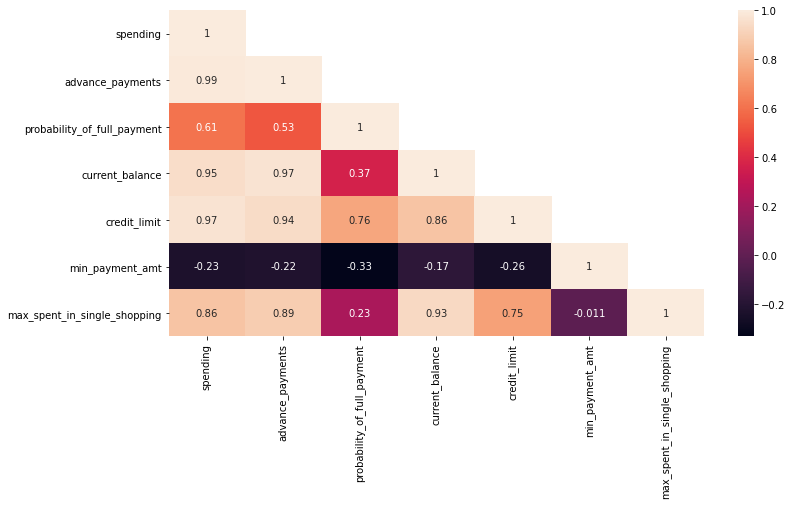

In [15]:
cor= df.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)]=False
fig,ax = plt.subplots()
fig.set_size_inches(12,6)
sns.heatmap(cor, mask=mask,annot= True)
plt.show()

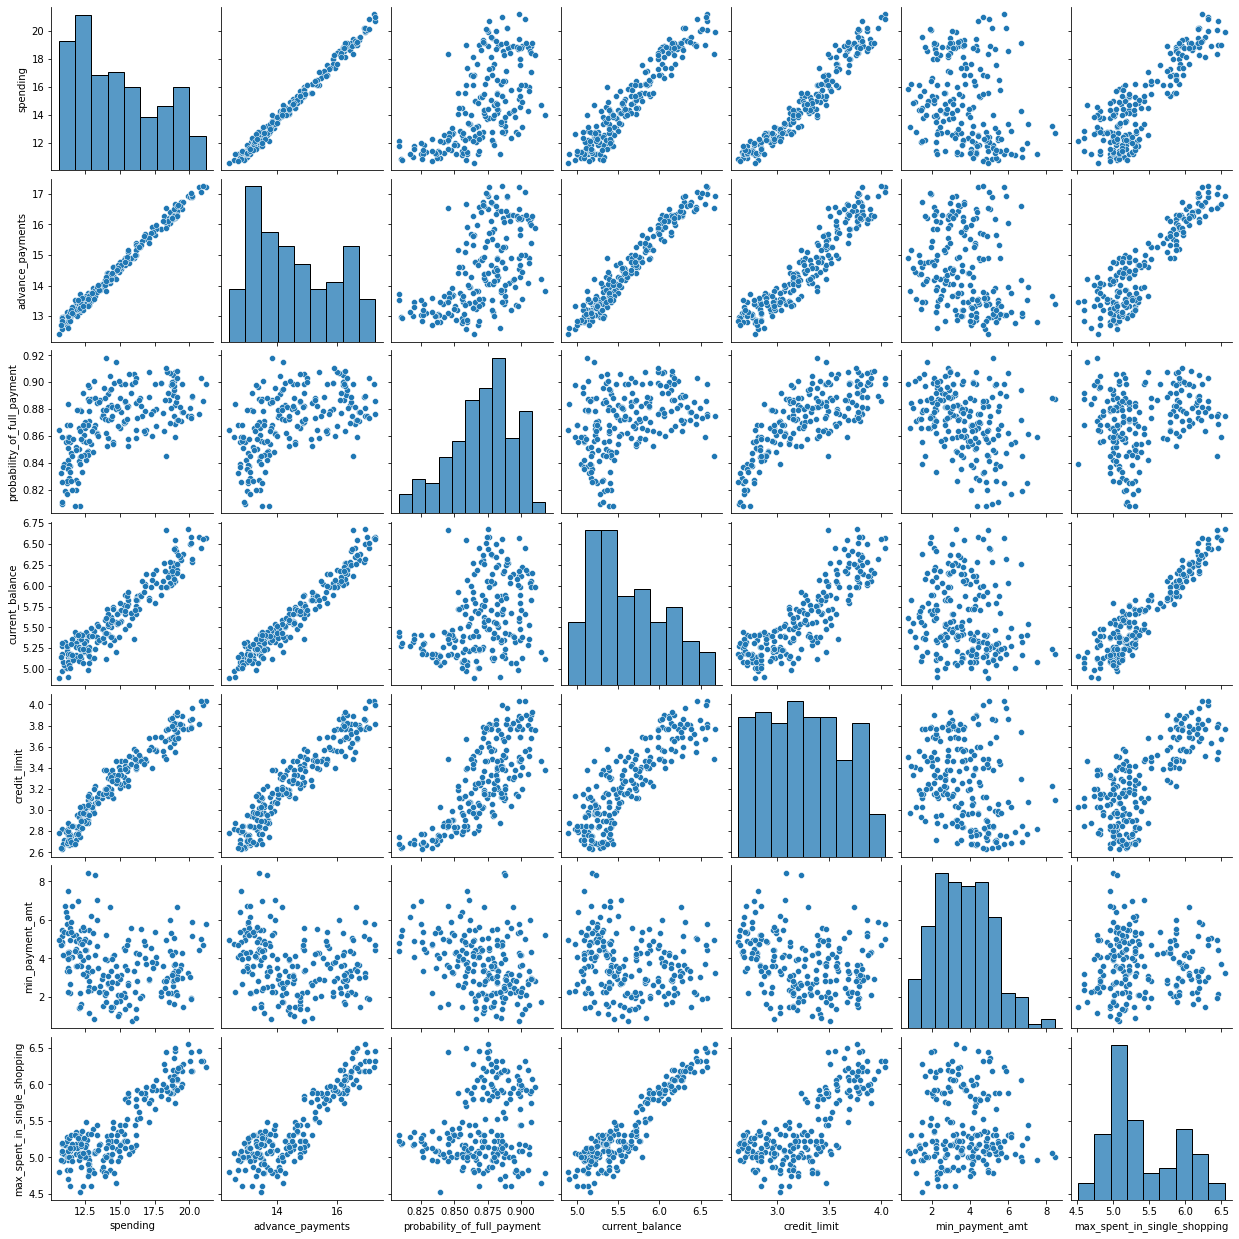

In [16]:
sns.pairplot(df);

#### Method 1 - Standard Scaler

## Q1.2) Do you think scaling is necessary for clustering in this case? Justify

X = StandardScaler()
df_scaled1 = X.fit_transform(df)
df_scaled1

In [17]:
X = StandardScaler()
df_scaled1 = X.fit_transform(df)
df_scaled1

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [18]:
df_scaled1 = pd.DataFrame(df_scaled1, index=df.index, columns=df.columns)
df_scaled1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


#### Method 2 - Zscore

In [19]:
df_scaled2 = df.apply(zscore)
df_scaled2.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [20]:
df_scaled1.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.243978e-15,-1.089076e-16,-2.994298e-16,5.302637e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


## Q1.3) Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [21]:
wardlink = linkage(df_scaled1, method = 'ward')

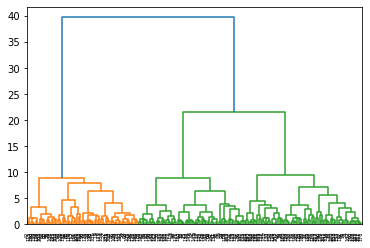

In [22]:
dend = dendrogram(wardlink)

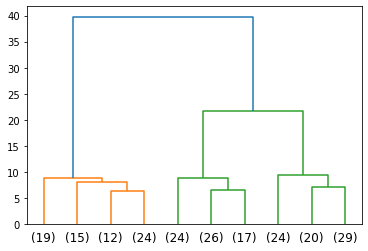

In [24]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10
                 )

In [25]:
#Method 1

clusters = fcluster(wardlink, 2, criterion='maxclust')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [26]:
#Method 2

clusters1 = fcluster(wardlink, 20, criterion='distance')
clusters1

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [27]:
df['H_Clusters'] = clusters1

In [28]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_Clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [29]:
df.H_Clusters.value_counts().sort_index()

1    70
2    67
3    73
Name: H_Clusters, dtype: int64

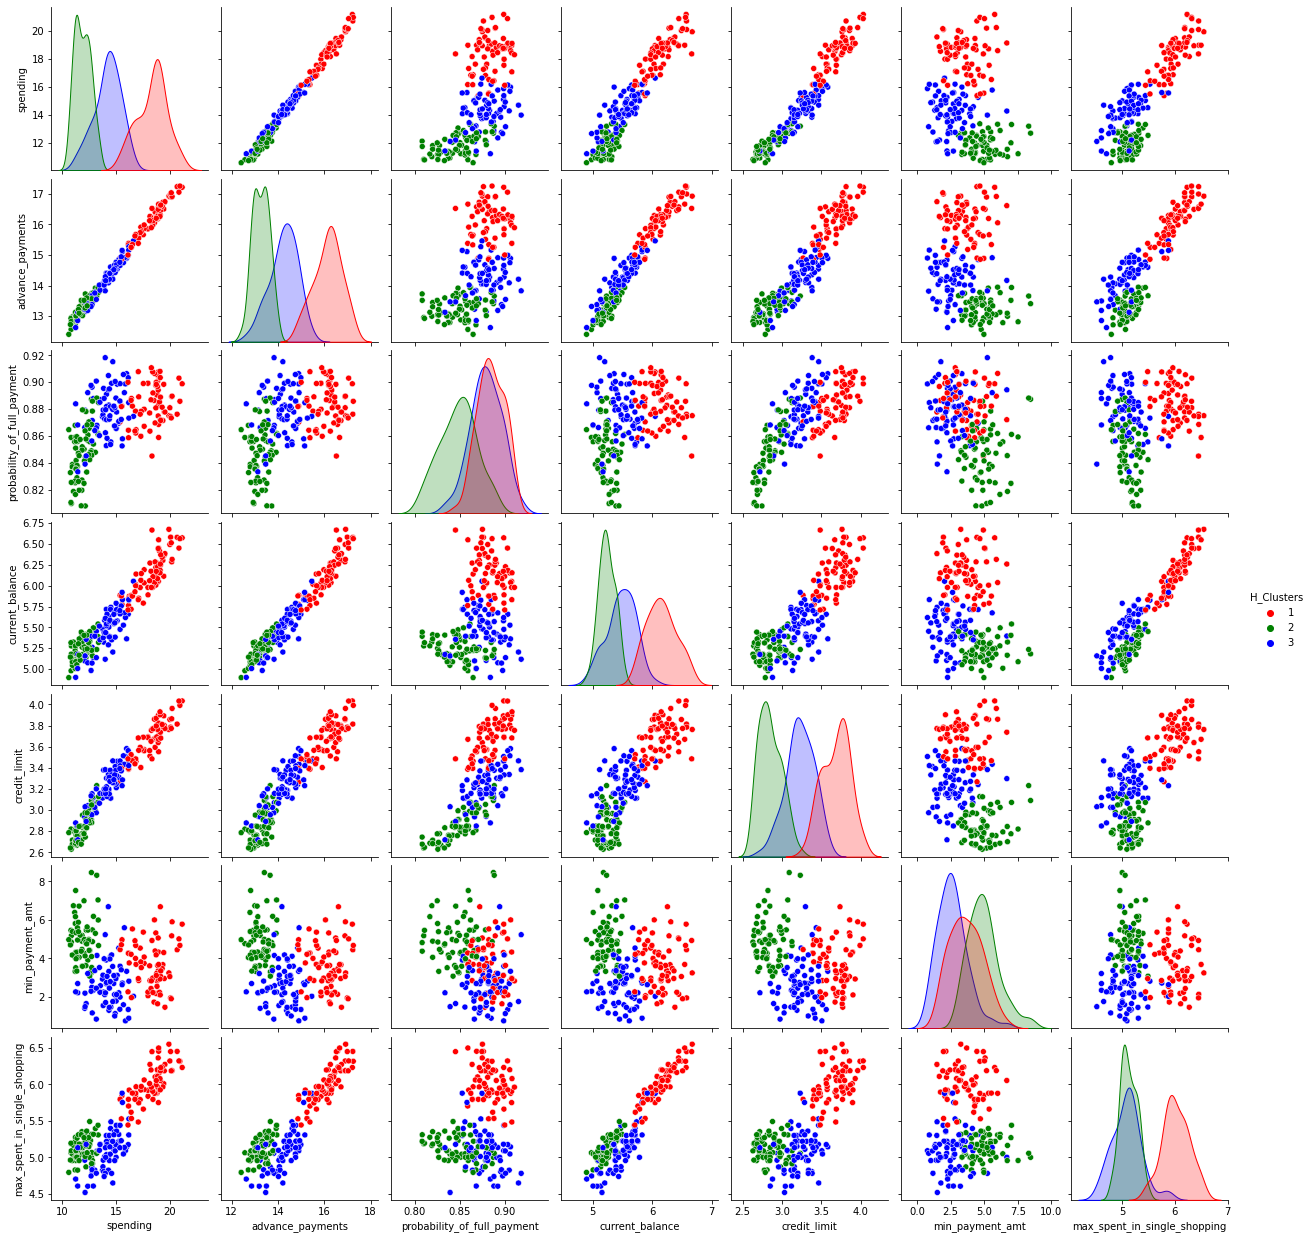

In [30]:
sns.pairplot(df,hue="H_Clusters",palette=["r","g","b"]);

## Q1.4) Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

### K-means Clustering

In [31]:
wss =[] 

In [32]:
for i in range(1,15):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df_scaled1)
    wss.append(KM.inertia_)

In [33]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.38509060801107,
 327.2127816566134,
 289.315995389595,
 262.98186570162267,
 241.8189465608603,
 223.91254221002728,
 206.3961218478669,
 193.28351331806456,
 182.97995389115252,
 175.11842017053078,
 166.02965682631782]

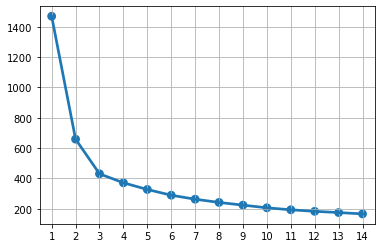

In [34]:
a = list(range(1,15))
sns.pointplot(a, wss);
plt.grid()

### Kmeans with k=2

In [35]:
k_means2 = KMeans(n_clusters = 2,random_state=1)
k_means2.fit(df_scaled1)
labels_2 = k_means2.labels_
labels_2

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

### Kmeans with k=3

In [36]:
k_means3 = KMeans(n_clusters = 3,random_state=1)
k_means3.fit(df_scaled1)
labels_3 = k_means3.labels_
labels_3

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [37]:
DF_Kmeans = df.drop('H_Clusters',axis=1)

In [38]:
silhouette_score(df_scaled1,labels_2)

0.46577247686580914

#### Silhouette score for k=2

In [39]:
sil_width = silhouette_samples(df_scaled1,labels_3)
df["sil_width"] = sil_width
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_Clusters,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.362276


#### Silhouette score for k=3

In [40]:
silhouette_score(df_scaled1,labels_3)

0.40072705527512986

In [41]:
silhouette_samples(df_scaled1,labels_3).min()

0.002713089347678376

In [42]:
df['Kmeans_clusters'] = labels_3

In [43]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_Clusters,sil_width,Kmeans_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.573699,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0.366386,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.637784,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0.512458,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.362276,2


In [44]:
df.Kmeans_clusters.value_counts().sort_index()

0    71
1    72
2    67
Name: Kmeans_clusters, dtype: int64

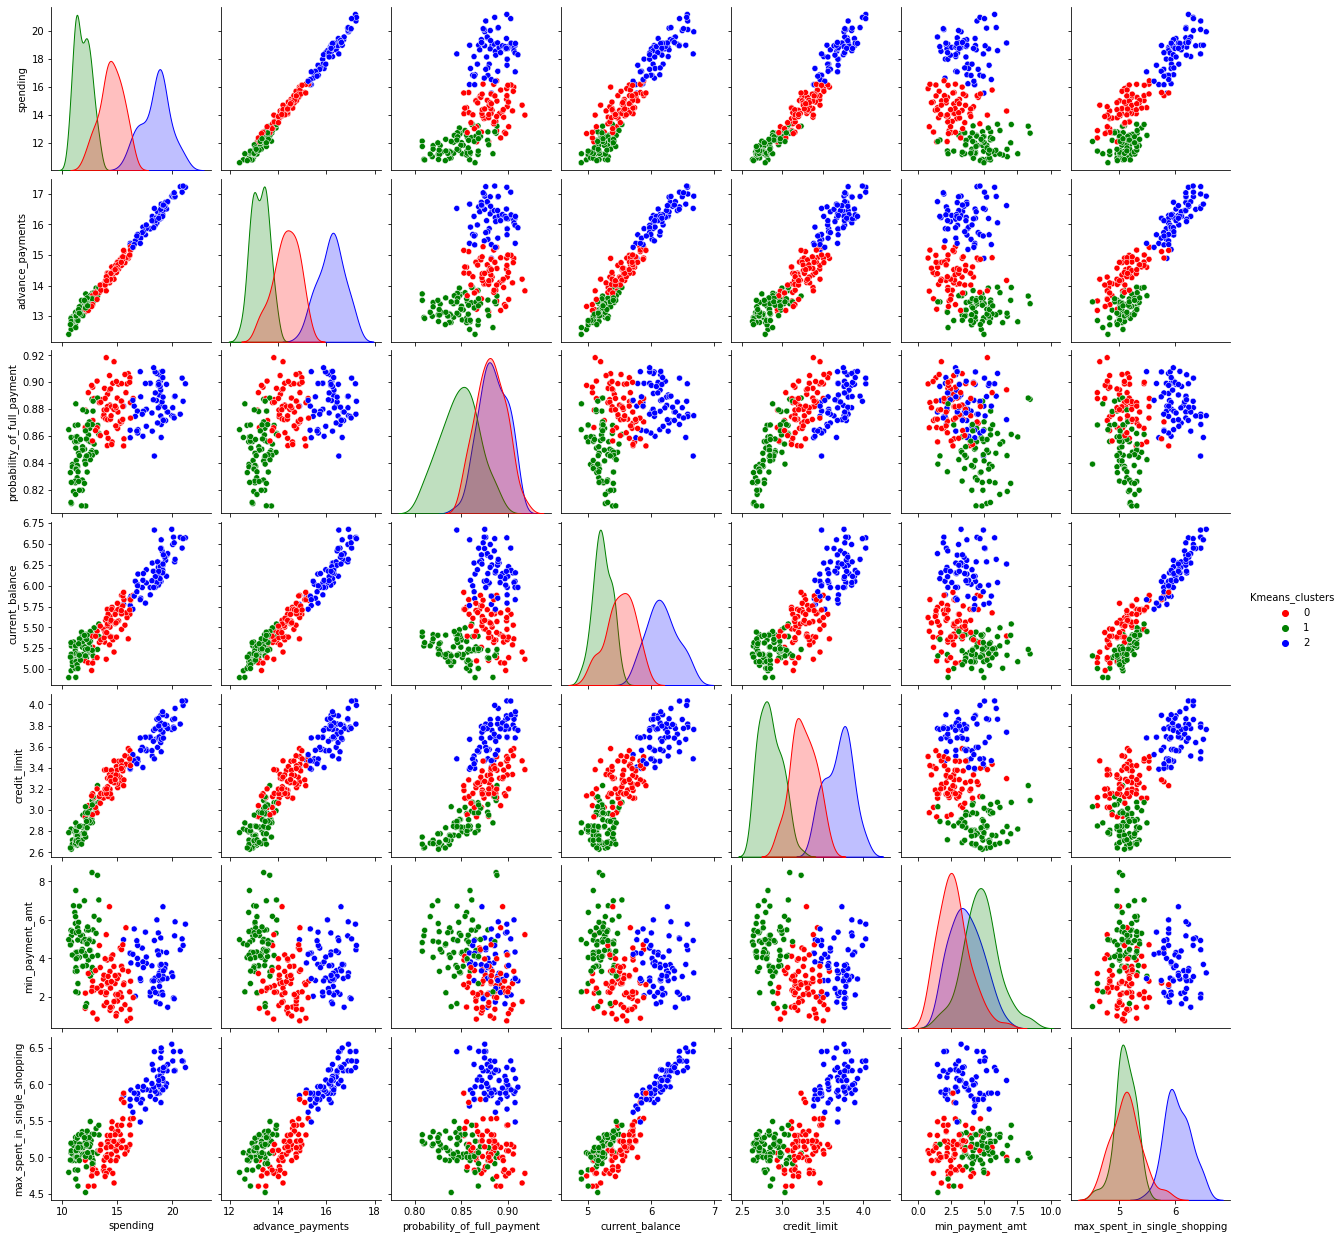

In [45]:
df1 = df.drop(['H_Clusters','sil_width'],axis=1)
sns.pairplot(df1,hue="Kmeans_clusters",palette=["r","g","b"]);

## Q1.5) Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [46]:
aggdata = df.drop(['sil_width','Kmeans_clusters'],axis=1)
aggdata = aggdata.groupby('H_Clusters').mean()
aggdata['Freq'] = df.H_Clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
H_Clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


In [47]:
aggdata1 = df.drop(['H_Clusters','sil_width'],axis=1)
aggdata1 = aggdata1.groupby('Kmeans_clusters').mean()
aggdata1['Freq'] = df.Kmeans_clusters.value_counts().sort_index()
aggdata1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Kmeans_clusters,,,,,,,,
0,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71
1,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,72
2,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67


# Problem 2: CART-RF-ANN

In [1]:
import numpy as np                      
import pandas as pd            
import seaborn as sns          
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings     
filterwarnings("ignore")
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

## Q2.1) Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [2]:
df = pd.read_csv('insurance_part2_data (2).csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [4]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [5]:
df.isnull().sum().any()

False

In [6]:
df.duplicated().sum()

139

In [7]:
df.drop_duplicates(inplace=True) 

In [8]:
for column in df[['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts())
    print('\n*************************************************\n')

AGENCY_CODE :  4
EPX    1238
C2B     913
CWT     471
JZI     239
Name: Agency_Code, dtype: int64

*************************************************

TYPE :  2
Travel Agency    1709
Airlines         1152
Name: Type, dtype: int64

*************************************************

CLAIMED :  2
No     1947
Yes     914
Name: Claimed, dtype: int64

*************************************************

CHANNEL :  2
Online     2815
Offline      46
Name: Channel, dtype: int64

*************************************************

PRODUCT NAME :  5
Customised Plan      1071
Bronze Plan           645
Cancellation Plan     615
Silver Plan           421
Gold Plan             109
Name: Product Name, dtype: int64

*************************************************

DESTINATION :  3
ASIA        2327
Americas     319
EUROPE       215
Name: Destination, dtype: int64

*************************************************



In [9]:
for column in df[['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel', 'Duration', 'Sales',
                  'Product Name', 'Destination']]:
    print(column.upper(), 'contains ?', ': ',(df[column] == "?").sum())
    print(column.upper(),': ',(df[column] == "*").sum())
    print(column.upper(),': ',(df[column] == "%").sum())
    print(column.upper(),': ',(df[column] == "&").sum())

AGE contains ? :  0
AGE :  0
AGE :  0
AGE :  0
AGENCY_CODE contains ? :  0
AGENCY_CODE :  0
AGENCY_CODE :  0
AGENCY_CODE :  0
TYPE contains ? :  0
TYPE :  0
TYPE :  0
TYPE :  0
CLAIMED contains ? :  0
CLAIMED :  0
CLAIMED :  0
CLAIMED :  0
COMMISION contains ? :  0
COMMISION :  0
COMMISION :  0
COMMISION :  0
CHANNEL contains ? :  0
CHANNEL :  0
CHANNEL :  0
CHANNEL :  0
DURATION contains ? :  0
DURATION :  0
DURATION :  0
DURATION :  0
SALES contains ? :  0
SALES :  0
SALES :  0
SALES :  0
PRODUCT NAME contains ? :  0
PRODUCT NAME :  0
PRODUCT NAME :  0
PRODUCT NAME :  0
DESTINATION contains ? :  0
DESTINATION :  0
DESTINATION :  0
DESTINATION :  0


In [10]:
df.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.90,0.95],include="all").T

,count,unique,top,freq,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
Age,2861.0,NaN,NaN,NaN,38.204124,10.678106,8.0,24.0,26.0,31.0,36.0,43.0,53.0,61.0,84.0
Agency_Code,2861,4,EPX,1238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,2861,2,Travel Agency,1709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,2861,2,No,1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,2861.0,NaN,NaN,NaN,15.080996,25.826834,0.0,0.0,0.0,0.0,5.63,17.82,50.25,63.21,210.21
Channel,2861,2,Online,2815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,2861.0,NaN,NaN,NaN,72.120238,135.9772,-1.0,4.0,6.0,12.0,28.0,66.0,239.0,367.0,4580.0
Sales,2861.0,NaN,NaN,NaN,61.757878,71.39974,0.0,10.0,13.0,20.0,33.5,69.3,178.0,230.0,539.0
Product Name,2861,5,Customised Plan,1071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,2861,3,ASIA,2327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.shape

(2861, 10)

### Univariate Analysis

In [12]:
df1 = df.drop(['Agency_Code','Type', 'Claimed', 'Channel', 'Product Name', 'Destination'],axis=1)

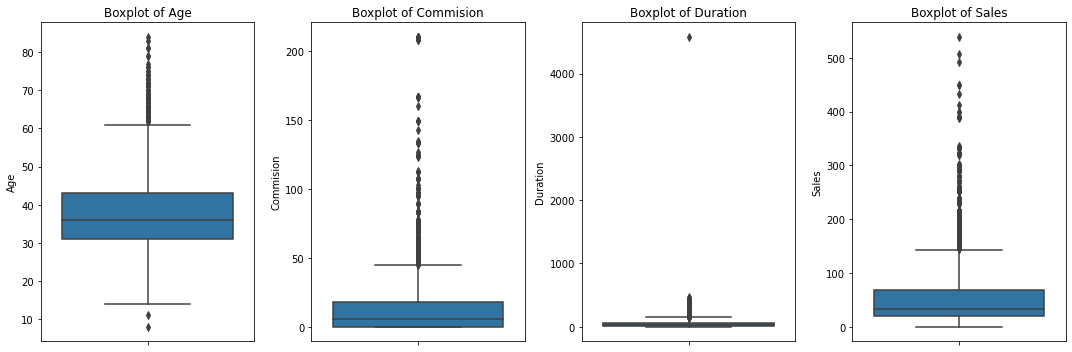

In [13]:
plt.figure(figsize=(15,5))
feature_list = df1.columns
for i in range(len(feature_list)):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y = df1[feature_list[i]], data = df1)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

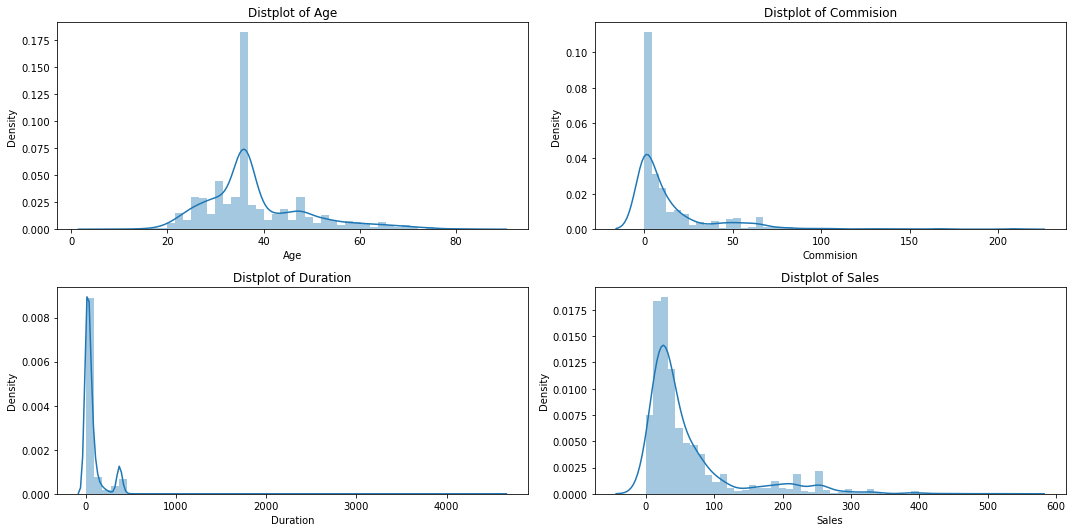

In [14]:
plt.figure(figsize=(15,7.5))
feature_list = df1.columns
for i in range(len(feature_list)):
    plt.subplot(2, 2, i + 1)
    sns.distplot(df1[df1.columns[i]])
    plt.title('Distplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [15]:
df1.skew(axis = 0)

Age           1.103145
Commision     3.104741
Duration     13.786096
Sales         2.344643
dtype: float64

### Multivariate Analysis

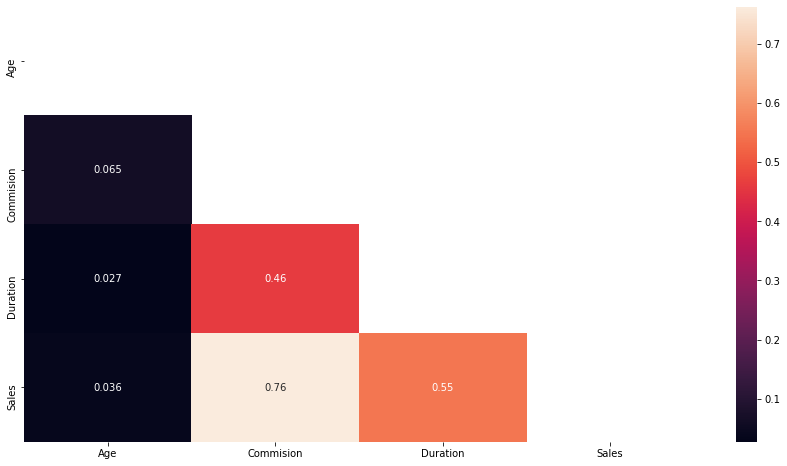

In [16]:
plt.figure(figsize=(15,8));
corr = df1.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,mask=mask,annot=True,);

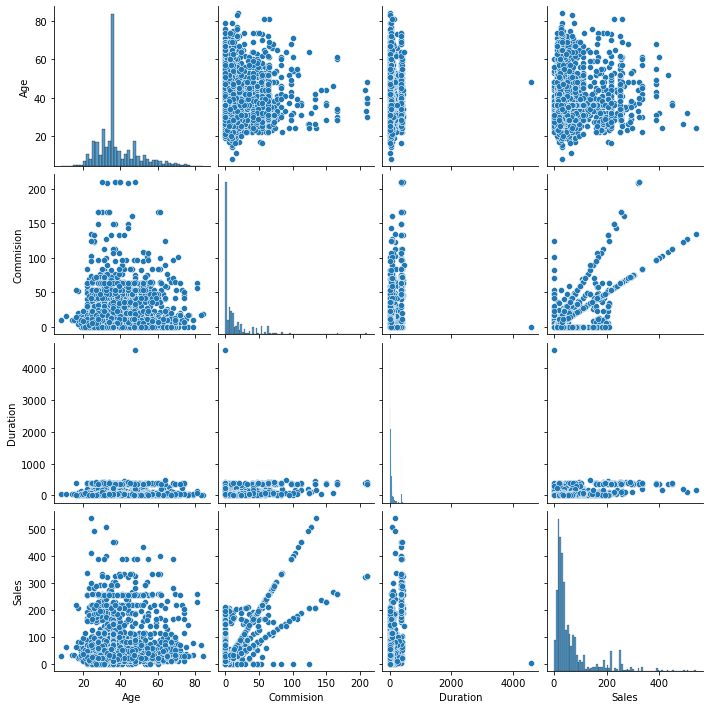

In [17]:
sns.pairplot(df1);

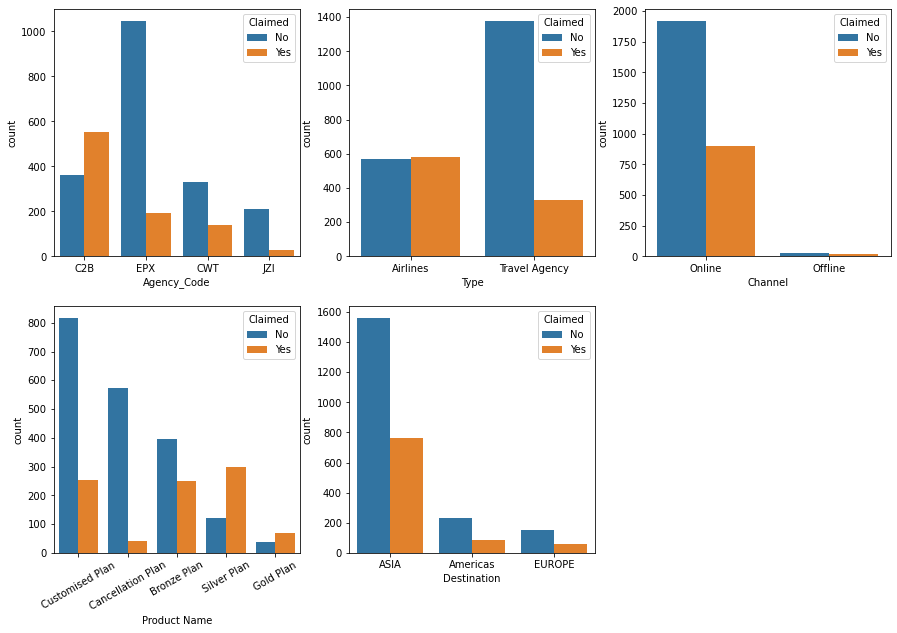

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2, 3, 1)
sns.countplot(df['Agency_Code'], hue=df['Claimed']);

plt.subplot(2, 3, 2)
sns.countplot(df['Type'], hue=df['Claimed']);

plt.subplot(2, 3, 3)
sns.countplot(df['Channel'], hue=df['Claimed']);

plt.subplot(2, 3, 4)
sns.countplot(df['Product Name'], hue=df['Claimed']);
plt.xticks(rotation=30);

plt.subplot(2, 3, 5)
sns.countplot(df['Destination'], hue=df['Claimed']);

## Q2.2) Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [19]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 193.1 KB


In [21]:
df.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

In [22]:
X = df.drop("Claimed", axis=1)

y = df.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [23]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [24]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


In [25]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [5,10,15,20],
    'min_samples_leaf': [25,50,75], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [26]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 300}


DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=300,
                       random_state=1)

In [27]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [29]:
param_grid1 = {
    'max_depth': [5,10,15],
    'max_features': [4,5,6],
    'min_samples_leaf': [5,10,15],
    'min_samples_split': [50,60,70],
    'n_estimators': [100,200,300],
}

rfcl = RandomForestClassifier(random_state=1)

grid_search1 = GridSearchCV(estimator = rfcl, param_grid = param_grid1, cv = 5)

In [30]:
grid_search1.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 10, 15], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [50, 60, 70],
                         'n_estimators': [100, 200, 300]})

In [31]:
grid_search1.best_params_

{'max_depth': 15,
 'max_features': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 60,
 'n_estimators': 100}

In [32]:
best_grid1 = grid_search1.best_estimator_

In [33]:
best_grid1

RandomForestClassifier(max_depth=15, max_features=5, min_samples_leaf=5,
                       min_samples_split=60, random_state=1)

In [34]:
param_grid2 = {
    'hidden_layer_sizes': [50,100,150],
    'max_iter': [250,500,750],
    'solver': ['adam','sgd'],
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search2 = GridSearchCV(estimator = nncl, param_grid = param_grid2, cv = 10)

In [35]:
grid_search2.fit(X_train, train_labels)
grid_search2.best_params_

{'hidden_layer_sizes': 100, 'max_iter': 250, 'solver': 'adam', 'tol': 0.01}

In [36]:
best_grid2 = grid_search2.best_estimator_
best_grid2

MLPClassifier(hidden_layer_sizes=100, max_iter=250, random_state=1, tol=0.01)

## Q2.3) Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

In [37]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [38]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.573171,0.426829
1,0.971223,0.028777
2,0.232975,0.767025
3,0.837500,0.162500
4,0.837500,0.162500


AUC: 0.809


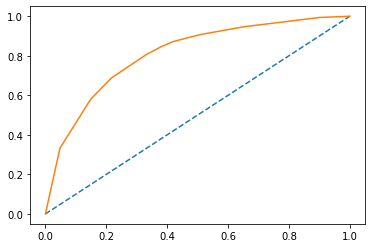

In [39]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr);

AUC: 0.796


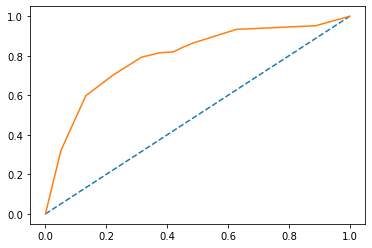

In [40]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr);

In [41]:
confusion_matrix(train_labels, ytrain_predict)

array([[1157,  202],
       [ 270,  373]], dtype=int64)

In [42]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7642357642357642

In [43]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1359
           1       0.65      0.58      0.61       643

    accuracy                           0.76      2002
   macro avg       0.73      0.72      0.72      2002
weighted avg       0.76      0.76      0.76      2002



In [44]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.65
cart_train_recall  0.58
cart_train_f1  0.61


In [45]:
confusion_matrix(test_labels, ytest_predict)

array([[510,  78],
       [109, 162]], dtype=int64)

In [46]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7823050058207218

In [47]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       588
           1       0.68      0.60      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.78      0.78      0.78       859



In [48]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.68
cart_test_recall  0.6
cart_test_f1  0.63


In [49]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.601720
Sales         0.305611
Product Name  0.047457
Duration      0.016689
Commision     0.014763
Age           0.013760
Type          0.000000
Channel       0.000000
Destination   0.000000


### Model Evaluation (Random Forest Classifier)

#### Predicting the Training and Testing data

In [50]:
ytrain_predict = best_grid1.predict(X_train)
ytest_predict = best_grid1.predict(X_test)

#### RF Model Performance Evaluation on Training data

In [51]:
confusion_matrix(train_labels,ytrain_predict)

array([[1225,  134],
       [ 259,  384]], dtype=int64)

In [52]:
rf_train_acc=best_grid1.score(X_train,train_labels) 
rf_train_acc

0.8036963036963037

In [53]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1359
           1       0.74      0.60      0.66       643

    accuracy                           0.80      2002
   macro avg       0.78      0.75      0.76      2002
weighted avg       0.80      0.80      0.80      2002



In [54]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.74
rf_train_recall  0.6
rf_train_f1  0.66


Area under Curve is 0.8653793556464193


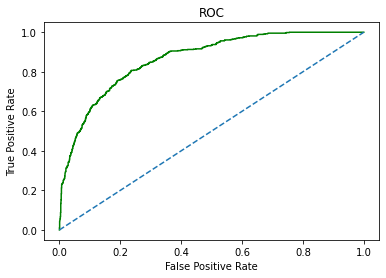

In [55]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid1.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid1.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

#### RF Model Performance Evaluation on Test data

In [56]:
confusion_matrix(test_labels,ytest_predict)

array([[523,  65],
       [121, 150]], dtype=int64)

In [57]:
rf_test_acc=best_grid1.score(X_test,test_labels)
rf_test_acc

0.7834691501746216

In [58]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       588
           1       0.70      0.55      0.62       271

    accuracy                           0.78       859
   macro avg       0.75      0.72      0.73       859
weighted avg       0.78      0.78      0.78       859



In [59]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.7
rf_test_recall  0.55
rf_test_f1  0.62


Area under Curve is 0.8141394934357506


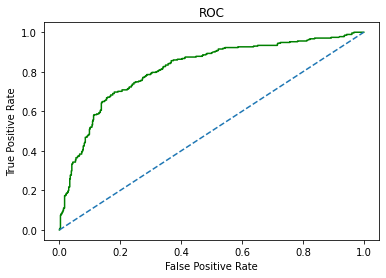

In [60]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid1.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid1.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

#### Variable Importance

In [61]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.601720
Sales         0.305611
Product Name  0.047457
Duration      0.016689
Commision     0.014763
Age           0.013760
Type          0.000000
Channel       0.000000
Destination   0.000000


### Model Evaluation (Artificial Neural Network)


#### Predicting the Training and Testing data

In [62]:
ytrain_predict = best_grid2.predict(X_train)
ytest_predict = best_grid2.predict(X_test)

#### NN Model Performance Evaluation on Training data

In [64]:
confusion_matrix(train_labels,ytrain_predict)

array([[1163,  196],
       [ 280,  363]], dtype=int64)

In [65]:
nn_train_acc=best_grid2.score(X_train,train_labels) 
nn_train_acc

0.7622377622377622

In [66]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1359
           1       0.65      0.56      0.60       643

    accuracy                           0.76      2002
   macro avg       0.73      0.71      0.72      2002
weighted avg       0.76      0.76      0.76      2002



In [67]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.65
nn_train_recall  0.56
nn_train_f1  0.6


Area under Curve is 0.7920464571767961


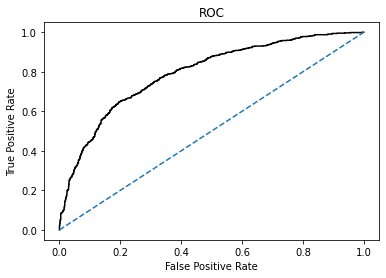

In [68]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid2.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid2.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

#### NN Model Performance Evaluation on Test data

In [70]:
confusion_matrix(test_labels,ytest_predict)

array([[510,  78],
       [118, 153]], dtype=int64)

In [71]:
nn_test_acc=best_grid2.score(X_test,test_labels)
nn_test_acc

0.7718277066356228

In [72]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       588
           1       0.66      0.56      0.61       271

    accuracy                           0.77       859
   macro avg       0.74      0.72      0.72       859
weighted avg       0.76      0.77      0.77       859



In [73]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.66
nn_test_recall  0.56
nn_test_f1  0.61


Area under Curve is 0.7911175540326832


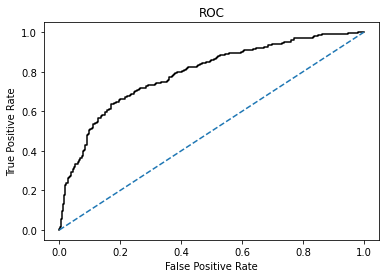

In [74]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid2.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid2.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

## Q2.4) Final Model: Compare all the models and write an inference which model is best/optimized.

In [75]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.76,0.78,0.80,0.78,0.76,0.77
AUC,0.81,0.80,0.87,0.81,0.79,0.79
Recall,0.58,0.60,0.60,0.55,0.56,0.56
Precision,0.65,0.68,0.74,0.70,0.65,0.66
F1 Score,0.61,0.63,0.66,0.62,0.60,0.61


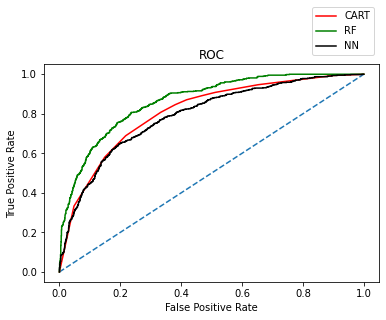

In [76]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');

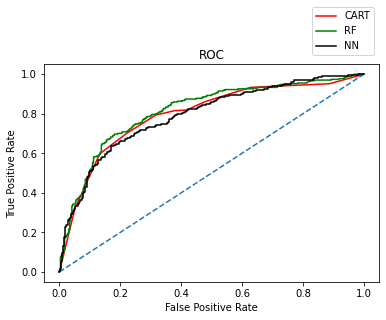

In [77]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');

## Q2.5) Inference: Based on the whole Analysis, what are the business insights and recommendations

#### Business Insights -
- Overall all the 3 models are moderately stable to be used for making any future predictions.
- From Cart and Random Forest Model, the variable Agency_Code is found to be the most useful feature amongst all other features for predicting if an agency has claimed insurance or not and product names is very slightly useful but could be useful for predictions.
- If Agency_Code is C2B, then those have more chances of claiming insurance. 
- And if it is EPX, CWT or JZI then those have more chances of not claiming insurance.
- If the product names are customised, cancellation and bronze plans, they are more likely to have higher chances of no insurance claims, whereas, if the names are gold and silver plans, they have a higher chances of having insurance claims.

#### Recommendations -
- We know agency code is the most important feature of insurance claim predicitions & product name somewhat important,
  - For whichever Agency code the insurance claim rate is higher, 
    - We could charge more premiums in exchange for insurance coverage where the claim rates are higher (C2B), then reinvesting those premiums into other interest-generating assets.
    - Reducing and sealing the claim amount so that not much money is spent on insurance claims.
    - Increasing the number of insurances done wherein there are low claiming rates (EPX, CWT or JZI), which in turn would lead to increase in revenue and more to use for the company for investments.
  - For whichever product name/ insurance plan type
    - We could charge more premiums in exchange for insurance coverage where the claim rates are higher (Gold and Silver plans), then reinvesting those premiums into other interest-generating assets.
    - Reducing and sealing the claim amount so that not much money is spent on insurance claims.
    - Increasing the number of insurances done wherein there are low claiming rates (customised, cancellation and bronze plans), which in turn would lead to increase in revenue and more to use for the company for investments.